In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from os.path import join as pjoin
from glob import glob
import numpy as np

import seaborn as sns
sns.set_style('darkgrid')
from matplotlib import pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (15,10)
mpl.rcParams['image.cmap'] = 'inferno'

import cv2
from skimage import data as skimages
from mycv import imread, imshow
import mycv

In [252]:
from utils_hist import *
from utils import *
from image_retrieval import Dataset

# Histogram implementation and comparison

*See implementations in `utils_hist.py`*

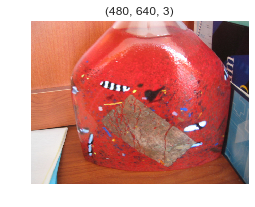

In [254]:
img = imreadurl(50)
imshow(img)

In [255]:
hist1 = hist_cv2(img)
hist2 = hist_np(img)
hist3 = hist(img)

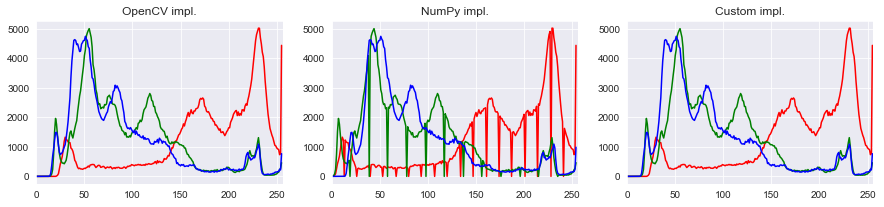

In [256]:
mpl.rcParams['figure.figsize'] = (15,3)
histshow(hist1, sub=(1,3,1), title='OpenCV impl.')
histshow(hist2, sub=(1,3,2), title='NumPy impl.')
histshow(hist3, sub=(1,3,3), title='Custom impl.')
plt.show()

# L2-distance between color histograms of two images

*See `Dataset` implementations in `image_retrieval.py`*

In [349]:
dataset = Dataset("./data", notebook=True)
dataset.get_hists()

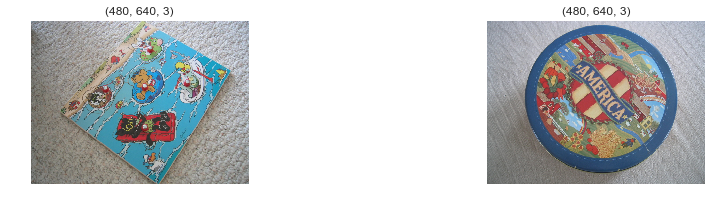

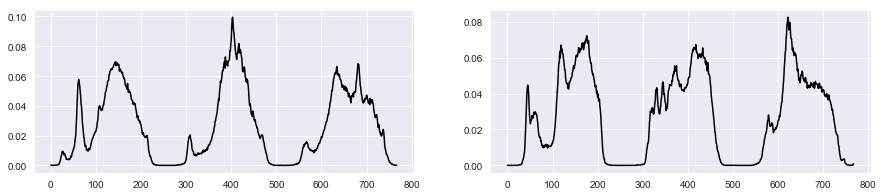

The distance is: 0.3699537270713698
The similarity is: 0.9315671199130011


In [264]:
i = 0
j = 5

imshow(dataset[i], sub=(1,2,1))
imshow(dataset[j], sub=(1,2,2))
plt.show()

histshow(dataset.hists[i], isdict=False, sub=(1,2,1))
histshow(dataset.hists[j], isdict=False, sub=(1,2,2))
plt.show()

print('The distance is:', dataset.get_distance(i, j)) # L2-distance
print('The similarity is:', dataset.get_similarity(i, j)) # Cosine similarity

# Image retrieval

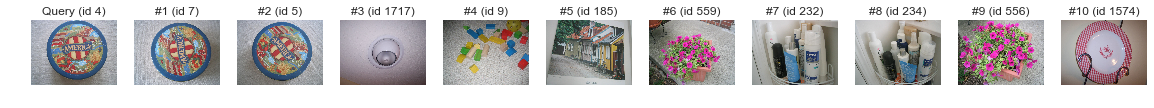

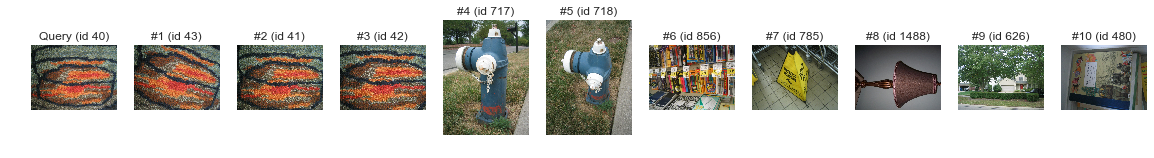

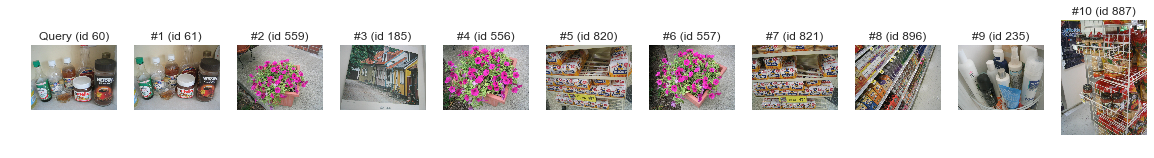

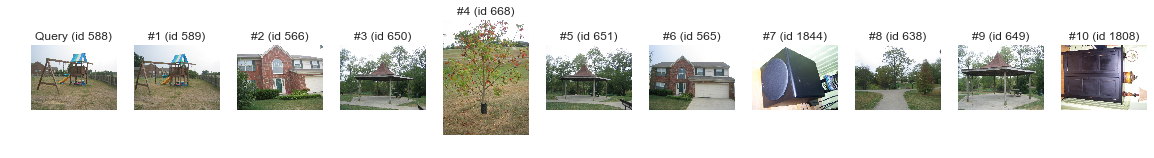

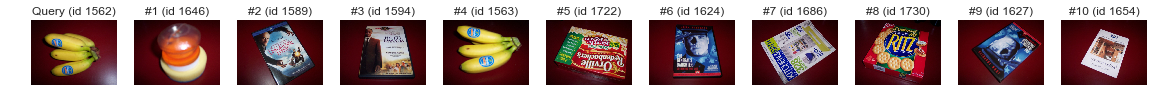

In [283]:
mpl.rcParams['figure.figsize'] = (20,5)
queries = [4, 40, 60, 588, 1562]
for i in queries:
    result = dataset.get_N_closest(i)
#     imshow(dataset[i], title='Query (id {})'.format(i))
#     print('Retrieved:')
#     imlistshow([dataset[r] for r in result],
#                titles=['#{} (id {})'.format(ind+1, r) for ind, r in enumerate(result)])
    imlistshow([dataset[r] for r in [i]+list(result)], rows=1,
               titles=['Query (id {})'.format(i)]+['#{} (id {})'.format(ind+1, r) for ind, r in enumerate(result)])

---

In [ ]:
import torch.nn as nn
from torchvision.models import vgg11_bn

def get_layers(model, ind):
    """ For plain models
    """
    modules_list = [module for module in model.modules() if len(list(module.children())) == 0]
    return nn.Sequential(*modules_list[:ind+1])

model = get_layers(vgg11_bn(pretrained=True), -8).to('cpu')

import torch
from torchvision.transforms import ToTensor, Normalize, Compose
means = [0.485, 0.456, 0.406]
stds = [0.229, 0.224, 0.225]
tr = Compose([ToTensor(), Normalize(means, stds)])
img = dataset[0]
img = tr(img)[np.newaxis,:,:,:]
descr = model(img).view(-1).detach().numpy()
descr.shape